# Example for Statistical and Exploratory Data Analysis

# Task:
<!--bibtex

@misc{breast_cancer_wisconsin_17,
  author       = {Wolberg, William, Mangasarian, Olvi, Street, Nick, and Street, W.},
  title        = {{Breast Cancer Wisconsin (Diagnostic)}},
  year         = {1993},
  howpublished = {UCI Machine Learning Repository},
  note         = {{DOI}: https://doi.org/10.24432/C5DW2B}
}
-->

Load the dataset [Breast Cancer Wisconsin (Diagnostic)](https://doi.org/10.24432/C5DW2B) via the `sklearn.datasets` module:

`from sklearn.datasets import load_breast_cancer`

And perform the following tasks:

- Display the first 5 rows of the dataset.



In [37]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()

# print the data keys
print(data.keys())

print("Decsription of the data")
print(data['DESCR'])

print("#############################################")
print("Attributes of the data")
print(data['feature_names'])

print("#############################################")
print("Target names")
print(data['target_names'])

print("#############################################")
print("Target")
print(data['target'].shape)

print("#############################################")
print("Frame")
print(data['frame'])

print("#############################################")
print("Data")
print(data['data'].shape)

print("#############################################")
print("Data Module")
print(data['data_module'])
print("#############################################")
print("Data Filename")
print(data['filename'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Decsription of the data
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each imag

In [ ]:
# transform the data into a pandas dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
# add the target to the dataframe
df_target = pd.DataFrame(data.target, columns=['target'])
# replace 0 and 1 with the target names
df_target = df_target.replace({0: 'malignant', 1: 'benign'})

# concatenate the data and the target
df = pd.concat([df, df_target], axis=1)

df


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant


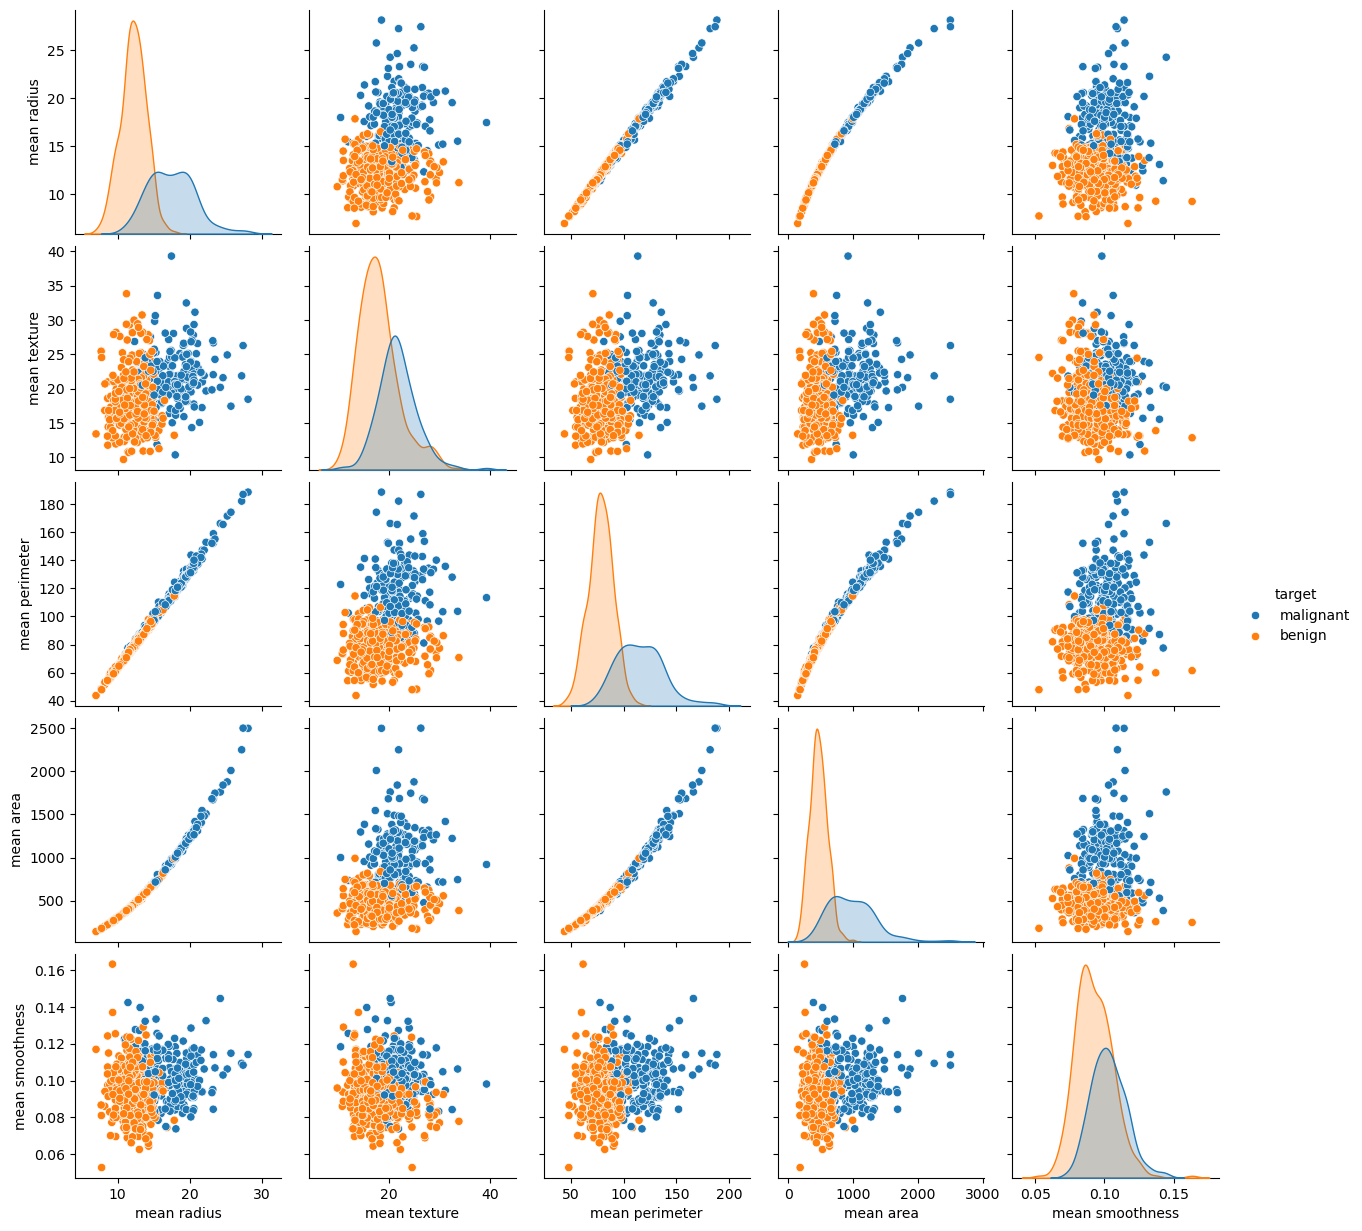

In [44]:
# make some plots
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df, vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'], hue='target')
plt.show()

Create a PCA model with 2 components and fit the model to the data. Then, transform the data to the first 2 principal components.

/var/folders/h4/xglxv6492992tn4h0nq57bvh0000gn/T/ipykernel_81388/1796649427.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  color = df['target'].replace({'malignant': 0, 'benign': 1})
/var/folders/h4/xglxv6492992tn4h0nq57bvh0000gn/T/ipykernel_81388/1796649427.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', 2)


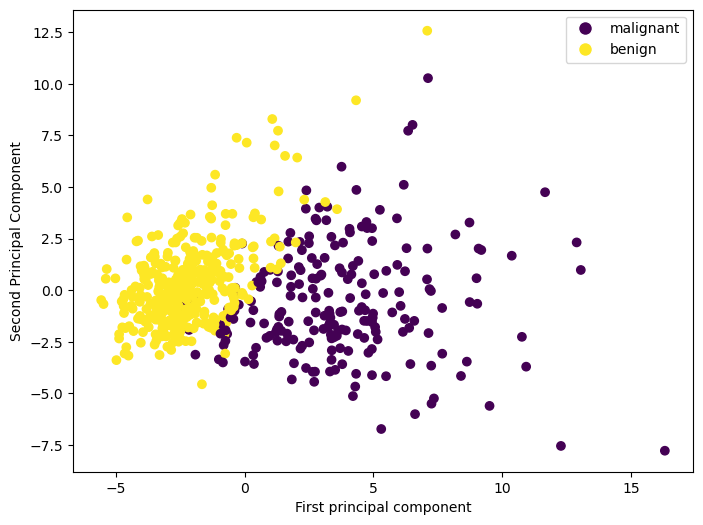

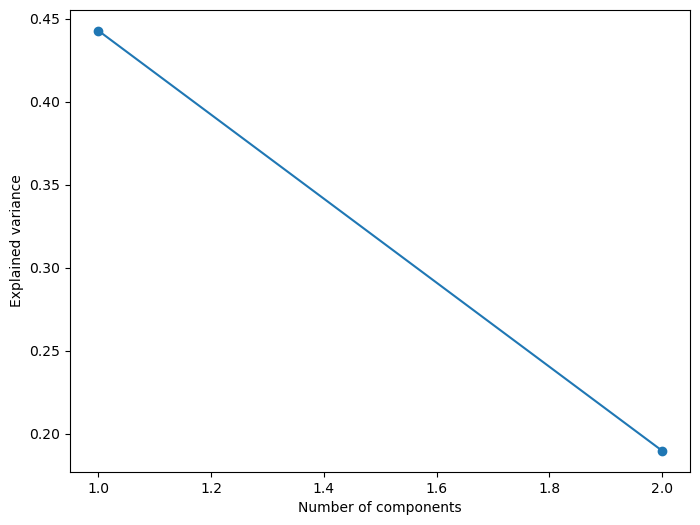

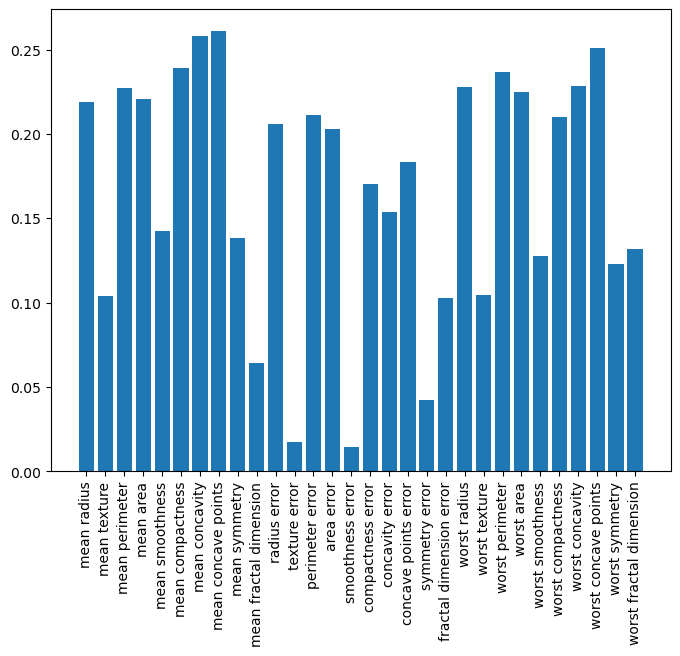

In [56]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

scaler = StandardScaler()
scaler.fit(df.drop('target', axis=1))
scaled_data = scaler.transform(df.drop('target', axis=1))   

pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
color = df['target'].replace({'malignant': 0, 'benign': 1})
cmap = plt.cm.get_cmap('viridis', 2)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=color,cmap='viridis')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

legend_elements = [Line2D([0], [0], marker='o', markerfacecolor=cmap(0), color='w', label='malignant', markersize=10),
                     Line2D([0], [0], marker='o', markerfacecolor=cmap(1), color='w', label='benign', markersize=10)]
plt.legend(handles=legend_elements)

plt.show()

# plot the explained variance
plt.figure(figsize=(8,6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

# plot the pca components
plt.figure(figsize=(8,6))
plt.bar(range(len(pca.components_[0])), pca.components_[0])
plt.xticks(range(len(pca.components_[0])), df.columns[:-1], rotation=90)
plt.show()

make a umap

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


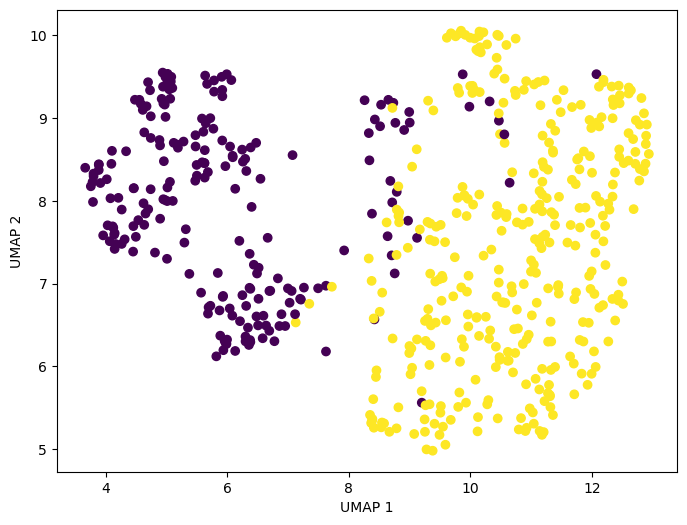

In [57]:
# umap
import umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(scaled_data)
plt.figure(figsize=(8,6))
plt.scatter(embedding[:,0], embedding[:,1], c=color, cmap='viridis')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

regression

classification

clustering

In [58]:
# regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

predictions = logmodel.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

# random forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))



/Users/stk/y/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[101   4]
 [  9  57]]
              precision    recall  f1-score   support

      benign       0.92      0.96      0.94       105
   malignant       0.93      0.86      0.90        66

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171

[[101   4]
 [  4  62]]
              precision    recall  f1-score   support

      benign       0.96      0.96      0.96       105
   malignant       0.94      0.94      0.94        66

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

